# Exploratory Data Analysis

This notebook contains the exploratory data analysis, showing simple tables and plots explaining the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
# Load data
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("filtered_flights.csv")

### Most Reliable Airline

This section explores which of the airlines in the dataset is the most reliable, i.e., which airline has the fewest delays as well as the shortest average delays.

In [3]:
# Defining "on time" threshold as 15 minutes
on_time_threshold = 15

# Creating new variables saying whether a flight was delayed on departure and arrival, respectively
flights["dep_on_time"] = (flights["DEPARTURE_DELAY"] <= on_time_threshold).astype(int)
flights["arr_on_time"] = (flights["ARRIVAL_DELAY"] <= on_time_threshold).astype(int)

In [4]:
# Aggregating by airline
summary_performance_airline = (
    flights.groupby("AIRLINE")
      .agg(
          mean_dep_delay=("DEPARTURE_DELAY", "mean"),
          mean_arr_delay=("ARRIVAL_DELAY", "mean"),
          dep_on_time_rate=("dep_on_time", "mean"),
          arr_on_time_rate=("arr_on_time", "mean"),
          n_flights=("AIRLINE", "size")
      )
)

In [5]:
# Showing full airline names instead of abbreviations
summary_performance_airline = summary_performance_airline.merge(
    airlines,
    left_on="AIRLINE",
    right_on="IATA_CODE",
    how="left"
).drop(columns=["IATA_CODE"])

In [6]:
# Sorting the airlines on highest on-time rate, then lowest average delay
summary_performance_airline = summary_performance_airline.sort_values(
    by=["arr_on_time_rate", "dep_on_time_rate", "mean_arr_delay", "mean_dep_delay"],
    ascending=[False, False, True, True]
)

Below is a table showing on time arrivals and departures as well as average arrival and departure delays.

In [7]:
# Showing the ranked airlines in a table
summary_performance_airline[["AIRLINE", "n_flights",
                       "arr_on_time_rate", "dep_on_time_rate",
                       "mean_arr_delay", "mean_dep_delay"]
                       ].rename(columns={"AIRLINE": "Airline",
                                         "n_flights": "Total Flights",
                                         "arr_on_time_rate": "On Time Arrivals (Rate)",
                                         "dep_on_time_rate": "On Time Departures (Rate)",
                                         "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                         "mean_dep_delay": "Average Departure Delay (Minutes)"}
                               ).reset_index(drop=True)

,Airline,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,Alaska Airlines Inc.,33201,0.881600,0.904973,-0.750732,0.593019
1,US Airways Inc.,11361,0.856527,0.893759,2.025438,3.224452
2,Delta Air Lines Inc.,47603,0.847951,0.840451,1.883597,8.364393
3,American Airlines Inc.,65055,0.839413,0.853324,1.818355,7.165833
4,United Air Lines Inc.,88315,0.813644,0.783978,4.235110,13.173306
5,Virgin America,29651,0.808506,0.819197,5.750772,9.171083
6,Skywest Airlines Inc.,134817,0.791169,0.803867,6.818962,8.588723
7,JetBlue Airways,20970,0.789080,0.789938,5.313444,10.661939
8,Southwest Airlines Co.,196907,0.785838,0.768916,6.720453,11.009291
9,Hawaiian Airlines Inc.,4299,0.773901,0.920679,6.508490,3.600605


The same thing can be showed in a bar plot, which is easier to interpret and compare across airlines.

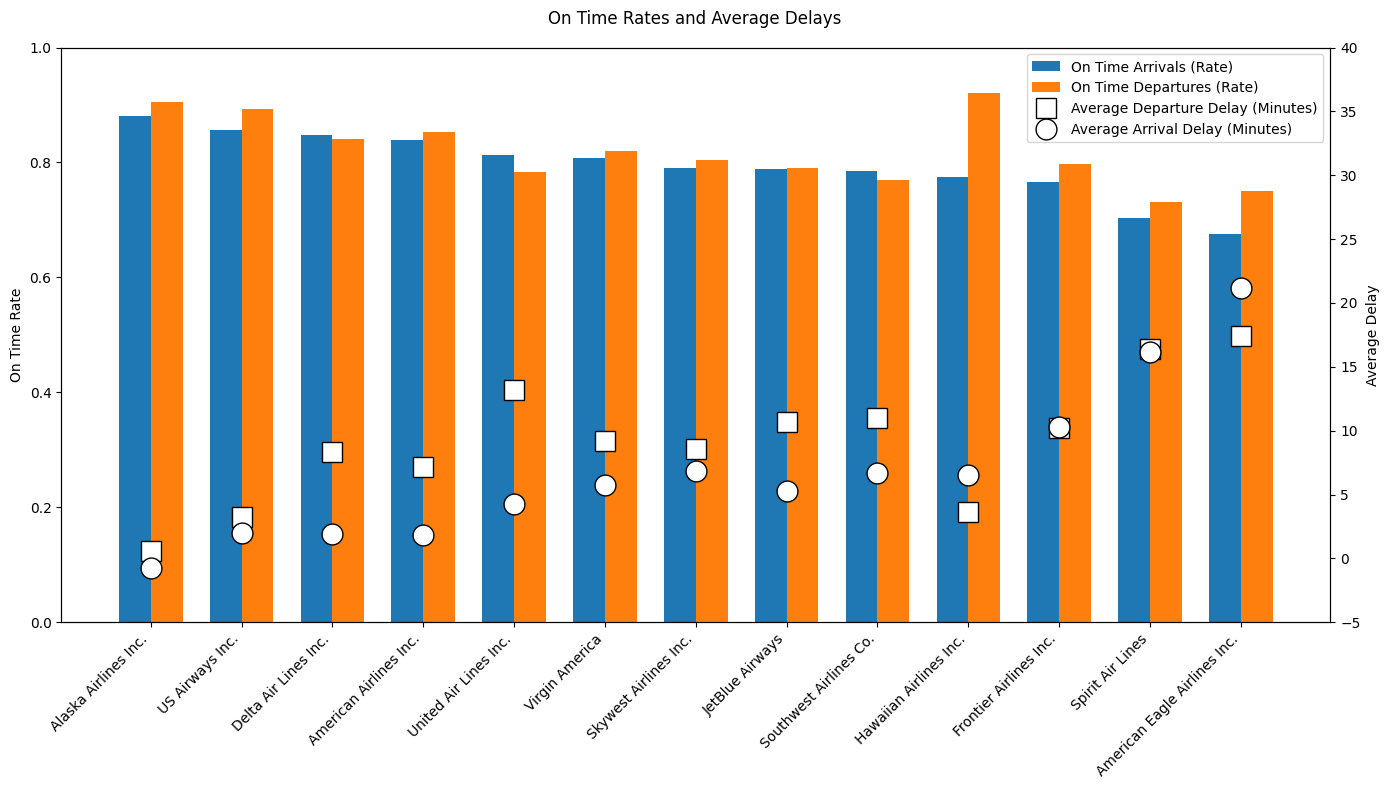

In [8]:
# Showing the ranked airlines in a bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
width = 0.35
ax1.bar(np.arange(len(summary_performance_airline["AIRLINE"])) - width/2, 
        summary_performance_airline["arr_on_time_rate"], width, label="On Time Arrivals (Rate)")
ax1.bar(np.arange(len(summary_performance_airline["AIRLINE"])) + width/2, 
        summary_performance_airline["dep_on_time_rate"], width, label="On Time Departures (Rate)")
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(np.arange(len(summary_performance_airline["AIRLINE"])))
ax1.set_xticklabels(summary_performance_airline["AIRLINE"], rotation=45, ha="right")

# Average Delays
ax2 = ax1.twinx()
ax2.plot(np.arange(len(summary_performance_airline["AIRLINE"])), 
         summary_performance_airline["mean_dep_delay"], marker="s", markersize=15, 
         linestyle="None", label="Average Departure Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.plot(np.arange(len(summary_performance_airline["AIRLINE"])), 
         summary_performance_airline["mean_arr_delay"], marker="o", markersize=15, 
         linestyle="None", label="Average Arrival Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay")

# Title
fig.suptitle("On Time Rates and Average Delays")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.show()

Alaska Airlines stands out as the most reliable carrier in the dataset, with the highest on time arrival and departure rates and even a slightly negative average arrival delay, indicating flights arrive early. US Airways, Delta Air Lines, and American Airlines also perform well, showing high on time rates combined with relatively low average delays. In contrast, American Eagle Airlines and Spirit Airlines rank lowest, showing both poor on time performance and the largest average delays. Large airlines like United Air Lines and Southwest Airlines operate many flights but suffer from high delays, telling us that scale may come at the cost of punctuality. Overall, the table and plot show big performance differences across airlines, with Alaska Airlines being the clear benchmark.

### Most Reliable Airport

Below, the same is done for airports, as we did for airlines.

In [9]:
# Aggregating by origin airport
summary_performance_airport = (
    flights.groupby("ORIGIN_AIRPORT")
      .agg(
          mean_dep_delay=("DEPARTURE_DELAY", "mean"),
          mean_arr_delay=("ARRIVAL_DELAY", "mean"),
          dep_on_time_rate=("dep_on_time", "mean"),
          arr_on_time_rate=("arr_on_time", "mean"),
          n_flights=("ORIGIN_AIRPORT", "size")
      )
)

In [11]:
# Showing full airport names instead of abbreviations
summary_performance_airport = summary_performance_airport.merge(
    airports,
    left_on="ORIGIN_AIRPORT",
    right_on="IATA_CODE",
    how="left"
).drop(columns=["IATA_CODE", "CITY", "STATE", "COUNTRY", "LATITUDE", "LONGITUDE"])

In [12]:
# Sorting the airports on highest on-time rate, then lowest average delay
summary_performance_airport = summary_performance_airport.sort_values(
    by=["arr_on_time_rate", "dep_on_time_rate", "mean_arr_delay", "mean_dep_delay"],
    ascending=[False, False, True, True]
)

Below is a table showing on time arrivals and departures as well as average arrival and departure delays.

In [15]:
# Showing the ranked airlines in a table
summary_performance_airport[["AIRPORT", "n_flights",
                       "arr_on_time_rate", "dep_on_time_rate",
                       "mean_arr_delay", "mean_dep_delay"]
                       ].rename(columns={"ORIGIN_AIRPORT": "Airport",
                                         "n_flights": "Total Flights",
                                         "arr_on_time_rate": "On Time Arrivals (Rate)",
                                         "dep_on_time_rate": "On Time Departures (Rate)",
                                         "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                         "mean_dep_delay": "Average Departure Delay (Minutes)"}
                               ).reset_index(drop=True)

,AIRPORT,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,John Wayne Airport (Orange County Airport),36986,0.852052,0.843400,1.655579,6.511605
1,Bob Hope Airport (Hollywood Burbank Airport),18838,0.845897,0.844516,3.142981,5.978842
2,McClellan-Palomar Airport,641,0.839314,0.868955,5.240446,5.353503
3,Redding Municipal Airport,725,0.838621,0.809655,0.191218,6.471671
4,Meadows Field,2626,0.838157,0.841203,3.502126,5.812138
5,Ontario International Airport,17928,0.830154,0.820281,4.139963,8.311216
6,Santa Maria Public Airport (Capt G. Allan Hanc...,663,0.828054,0.841629,5.880368,8.843558
7,San Diego International Airport (Lindbergh Field),69915,0.822570,0.819095,3.328988,8.314869
8,Palm Springs International Airport,8957,0.822039,0.828737,6.007783,7.961985
9,Sacramento International Airport,37093,0.821395,0.828135,5.451832,8.032538


The same thing can be showed in a bar plot, which is easier to interpret and compare across airports.

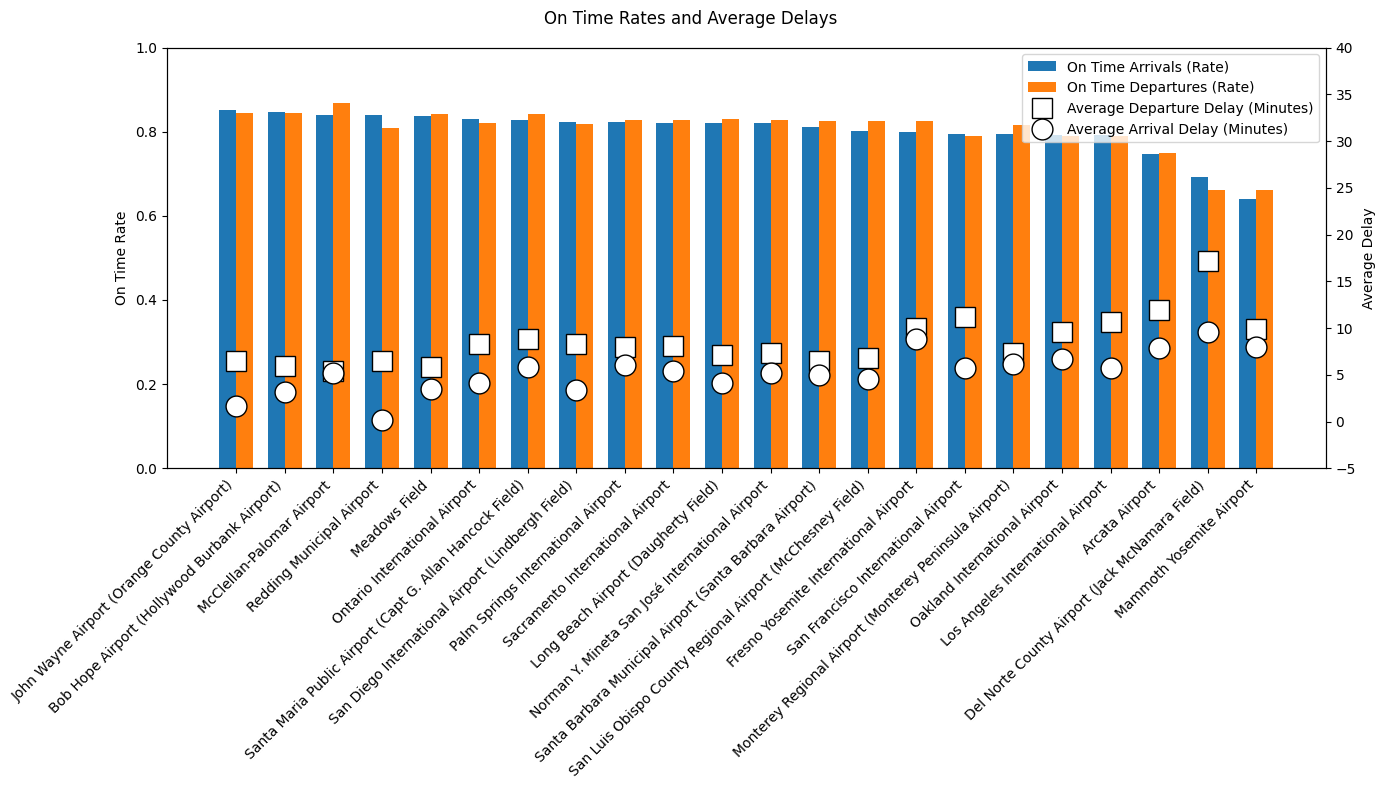

In [17]:
# Showing the ranked airports in a bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
width = 0.35
ax1.bar(np.arange(len(summary_performance_airport["AIRPORT"])) - width/2, 
        summary_performance_airport["arr_on_time_rate"], width, label="On Time Arrivals (Rate)")
ax1.bar(np.arange(len(summary_performance_airport["AIRPORT"])) + width/2, 
        summary_performance_airport["dep_on_time_rate"], width, label="On Time Departures (Rate)")
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(np.arange(len(summary_performance_airport["AIRPORT"])))
ax1.set_xticklabels(summary_performance_airport["AIRPORT"], rotation=45, ha="right")

# Average Delays
ax2 = ax1.twinx()
ax2.plot(np.arange(len(summary_performance_airport["AIRPORT"])), 
         summary_performance_airport["mean_dep_delay"], marker="s", markersize=15, 
         linestyle="None", label="Average Departure Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.plot(np.arange(len(summary_performance_airport["AIRPORT"])), 
         summary_performance_airport["mean_arr_delay"], marker="o", markersize=15, 
         linestyle="None", label="Average Arrival Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay")

# Title
fig.suptitle("On Time Rates and Average Delays")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.show()

John Wayne Airport is the most reliable airport, with the highest on time arrival and departure rates and relatively low average delays. Bob Hope Airport, McClellan–Palomar Airport, and Redding Municipal Airport also perform strongly, showing efficient operations despite big differences in the flight volume of the airports. In contrast, Mammoth Yosemite Airport, Del Norte County Airport, and Arcata Airport rank the lowest, with substantially worse punctuality and the highest average delays, suggesting capacity-related challenges at smaller airports. Larger airports like Los Angeles International Airport and San Francisco International Airport handle very high traffic volumes but show worse punctuality. In summary, airport performance varies a lot, and this is not just explained by airport size.